In [29]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import ast
import matplotlib.pyplot as plt

In [30]:
root = 'archive/'

In [31]:
interactions_test = pd.read_csv(f'{root}interactions_test.csv')
interactions_train = pd.read_csv(f'{root}interactions_train.csv')
interactions_validation = pd.read_csv(f'{root}interactions_validation.csv')
PP_recipes = pd.read_csv(f'{root}PP_recipes.csv').set_index('i').sort_index()
PP_users = pd.read_csv(f'{root}PP_users.csv').set_index('u').sort_index()
RAW_interactions = pd.read_csv(f'{root}RAW_interactions.csv')
RAW_recipes = pd.read_csv(f'{root}RAW_recipes.csv')

In [32]:
recipe_review_counts = RAW_interactions.groupby('recipe_id')['rating'].count()
recipe_review_counts

recipe_id
38        4
39        1
40        9
41        2
43        1
         ..
537459    1
537485    1
537543    1
537671    1
537716    1
Name: rating, Length: 231637, dtype: int64

In [33]:
PP_recipes.dtypes

id                    int64
name_tokens          object
ingredient_tokens    object
steps_tokens         object
techniques           object
calorie_level         int64
ingredient_ids       object
dtype: object

In [34]:
PP_recipes['n_reviewers'] = PP_recipes['id'].apply(lambda x: recipe_review_counts[x])
PP_recipes['name_tokens'] = PP_recipes['name_tokens'].apply(lambda x: ast.literal_eval(x))
PP_recipes['ingredient_tokens'] = PP_recipes['ingredient_tokens'].apply(lambda x: ast.literal_eval(x))
PP_recipes['steps_tokens'] = PP_recipes['steps_tokens'].apply(lambda x: ast.literal_eval(x))
PP_recipes['techniques'] = PP_recipes['techniques'].apply(lambda x: ast.literal_eval(x))
PP_recipes['ingredient_ids'] = PP_recipes['ingredient_ids'].apply(lambda x: ast.literal_eval(x))
PP_recipes['n_steps'] = PP_recipes.merge(RAW_recipes, on='id', how='left')['n_steps']

PP_recipes

,id,name_tokens,ingredient_tokens,steps_tokens,techniques,calorie_level,ingredient_ids,n_reviewers,n_steps
i,,,,,,,,,
0,40893,"[40480, 1454, 16201, 2056, 955, 541, 11332, 82...","[[1424, 8876, 11007], [3484, 21453], [38966, 2...","[40480, 40482, 23667, 11007, 240, 21453, 240, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, ...",0,"[3384, 7979, 2127, 3502, 3217, 1257, 2778, 500...",2,4
1,44394,"[40480, 34712, 22683, 11274, 5409, 29868, 40481]","[[5343, 535, 2044, 5409, 7087], [17869, 6020],...","[40480, 40482, 12172, 1281, 5409, 7087, 240, 6...","[1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,"[912, 7557, 2499, 5382]",1,5
2,85009,"[40480, 12187, 13995, 571, 14719, 40481]","[[1061, 494, 813, 2141], [31843], [30645, 4785...","[40480, 40482, 2572, 19472, 31757, 512, 823, 4...","[1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, ...",2,"[4623, 6265, 1168, 6016, 3597, 3440, 7213, 169...",2,3
3,134728,"[40480, 27, 12, 263, 4017, 1494, 273, 14122, 4...","[[5867, 34056], [17918], [15022, 8361], [6953]...","[40480, 40482, 7087, 17918, 240, 6953, 488, 11...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,"[1304, 2683, 3217, 6270, 3532, 869, 7557, 3698...",7,10
4,200236,"[40480, 16212, 11880, 556, 19811, 12772, 22075...","[[16212, 1535], [6953], [1430, 1301, 11332], [...","[40480, 40482, 2525, 10906, 485, 29848, 40478,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...",2,"[4130, 6270, 3486, 7557, 5010, 3203, 2683, 125...",4,14
...,...,...,...,...,...,...,...,...,...
178260,50804,"[40480, 5867, 3586, 17532, 14349, 29139, 40481]","[[589, 260, 4001, 17918], [6953], [15473, 1016...","[40480, 40482, 5867, 271, 715, 11868, 2525, 48...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",2,"[63, 6270, 335, 332, 4717, 2499, 6676, 4987, 6...",1,11
178261,492861,"[40480, 554, 13641, 2169, 40481]","[[1353], [2169], [1430, 857, 643, 1631], [1657...","[40480, 40482, 6927, 481, 11007, 271, 14259, 4...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,"[7655, 1625, 3489, 7821]",2,13
178262,249924,"[40480, 7482, 8533, 9, 263, 1494, 273, 5867, 1...","[[1657, 5867], [24329, 26285], [6945, 978, 113...","[40480, 40482, 587, 616, 246, 850, 522, 867, 7...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...",2,"[7819, 1504, 1986, 3732, 7714]",5,9


In [35]:
PP_users['techniques'] = PP_users['techniques'].apply(lambda x: ast.literal_eval(x))
PP_users['items'] = PP_users['items'].apply(lambda x: ast.literal_eval(x))
PP_users['ratings'] = PP_users['ratings'].apply(lambda x: ast.literal_eval(x))

PP_users

,techniques,items,n_items,ratings,n_ratings
u,,,,,
0,"[8, 0, 0, 5, 6, 0, 0, 1, 0, 9, 1, 0, 0, 0, 1, ...","[1118, 27680, 32541, 137353, 16428, 28815, 658...",31,"[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 4.0, 4.0, ...",31
1,"[11, 0, 0, 2, 12, 0, 0, 0, 0, 14, 5, 0, 0, 0, ...","[122140, 77036, 156817, 76957, 68818, 155600, ...",39,"[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, ...",39
2,"[13, 0, 0, 7, 5, 0, 1, 2, 1, 11, 0, 1, 0, 0, 1...","[168054, 87218, 35731, 1, 20475, 9039, 124834,...",27,"[3.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 5.0, ...",27
3,"[498, 13, 4, 218, 376, 3, 2, 33, 16, 591, 10, ...","[163193, 156352, 102888, 19914, 169438, 55772,...",1513,"[5.0, 5.0, 5.0, 5.0, 4.0, 4.0, 5.0, 5.0, 5.0, ...",1513
4,"[161, 1, 1, 86, 93, 0, 0, 11, 2, 141, 0, 16, 0...","[72857, 38652, 160427, 55772, 119999, 141777, ...",376,"[5.0, 5.0, 5.0, 5.0, 4.0, 4.0, 5.0, 4.0, 5.0, ...",376
...,...,...,...,...,...
25071,"[1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...","[144172, 154054]",2,"[5.0, 5.0]",2
25072,"[1, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...","[162436, 148228]",2,"[5.0, 5.0]",2
25073,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[162681, 172034]",2,"[5.0, 5.0]",2


In [36]:
recipes_interactions_merged = interactions_train.merge(PP_recipes, left_on='recipe_id', right_index=True, how='left')
users_interactions_merged = interactions_train.merge(PP_users, left_on='recipe_id', right_index=True, how='left')
avg_ratings_per_recipe = recipes_interactions_merged.groupby('recipe_id')['rating'].mean()
avg_ratings_per_user = users_interactions_merged.groupby('user_id')['rating'].mean()

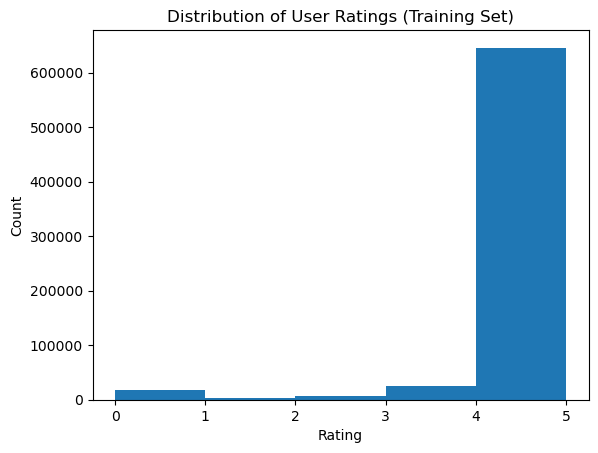

In [37]:
plt.hist(interactions_train['rating'], bins=5)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of User Ratings (Training Set)')
plt.show()

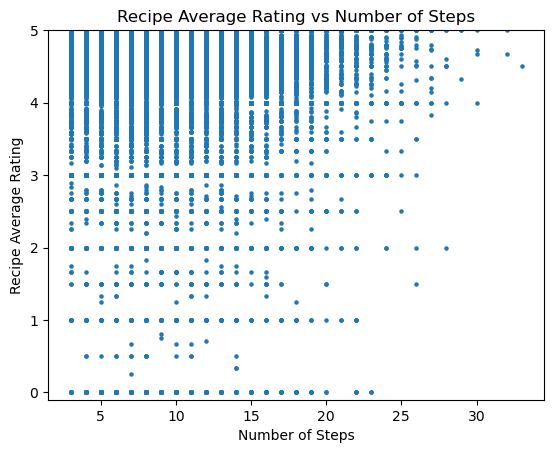

In [38]:
steps_per_recipe = recipes_interactions_merged.groupby('recipe_id')['n_steps'].first()

plt.scatter(steps_per_recipe, avg_ratings_per_recipe, s=5)
plt.xlabel('Number of Steps')
plt.ylabel('Recipe Average Rating')
plt.ylim(-0.1,5)
plt.title('Recipe Average Rating vs Number of Steps')
plt.show()

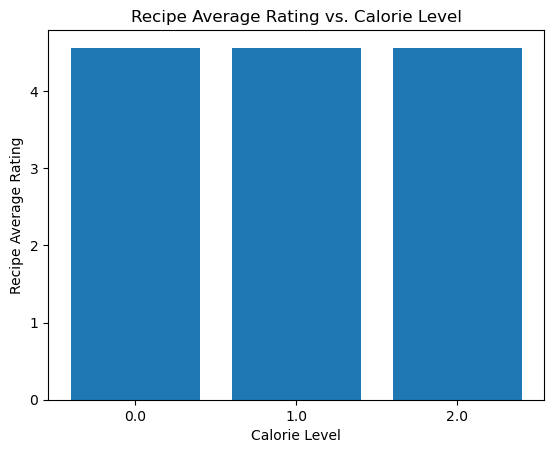

In [39]:
calorie_level_per_recipe = recipes_interactions_merged.groupby('calorie_level')['rating'].mean()

plt.bar(x=calorie_level_per_recipe.index.astype(str), height=calorie_level_per_recipe)
plt.xlabel('Calorie Level')
plt.ylabel('Recipe Average Rating')
plt.title('Recipe Average Rating vs. Calorie Level');

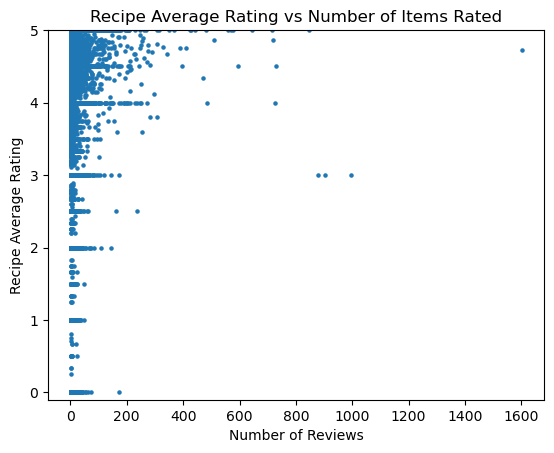

In [40]:
reviews_per_recipe = recipes_interactions_merged.groupby('recipe_id')['n_reviewers'].first()

plt.scatter(reviews_per_recipe, avg_ratings_per_recipe, s=5)
plt.xlabel('Number of Reviews')
plt.ylabel('Recipe Average Rating')
plt.ylim(-0.1,5)
plt.title('Recipe Average Rating vs Number of Items Rated');

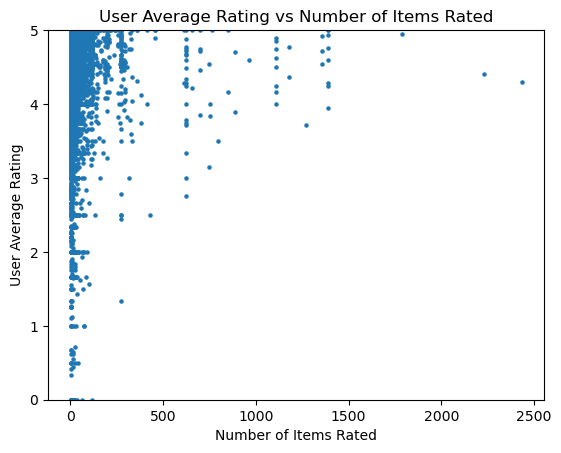

In [41]:
items_per_user = users_interactions_merged.groupby('user_id')['n_items'].first()

plt.scatter(items_per_user, avg_ratings_per_user, s=5)
plt.xlabel('Number of Items Rated')
plt.ylabel('User Average Rating')
plt.ylim(0,5)
plt.title('User Average Rating vs Number of Items Rated');

In [42]:
def Jaccard(s1, s2):
    numer = len(s1.intersection(s2))
    denom = len(s1.union(s2))
    if denom > 0:
        return numer/denom
    return 0

def MSE(predictions, y):
    diffs = [(a-b)**2 for (a,b) in zip(predictions, y)]
    return sum(diffs)/len(diffs)

def euclidean_distance(arr1, arr2):
    return np.sqrt(sum((arr1 - arr2)**2))

def normalize(arr):
    min = np.min(arr)
    max = np.max(arr)

    return (arr - min) / (max - min)

In [43]:
train_X = interactions_train.drop(columns=['rating'])
train_y = interactions_train['rating']
validation_X = interactions_validation.drop(columns=['rating'])
validation_y = interactions_validation['rating']
test_X = interactions_test.drop(columns=['rating'])
test_y = interactions_test['rating']

In [44]:
PP_recipes

,id,name_tokens,ingredient_tokens,steps_tokens,techniques,calorie_level,ingredient_ids,n_reviewers,n_steps
i,,,,,,,,,
0,40893,"[40480, 1454, 16201, 2056, 955, 541, 11332, 82...","[[1424, 8876, 11007], [3484, 21453], [38966, 2...","[40480, 40482, 23667, 11007, 240, 21453, 240, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, ...",0,"[3384, 7979, 2127, 3502, 3217, 1257, 2778, 500...",2,4
1,44394,"[40480, 34712, 22683, 11274, 5409, 29868, 40481]","[[5343, 535, 2044, 5409, 7087], [17869, 6020],...","[40480, 40482, 12172, 1281, 5409, 7087, 240, 6...","[1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,"[912, 7557, 2499, 5382]",1,5
2,85009,"[40480, 12187, 13995, 571, 14719, 40481]","[[1061, 494, 813, 2141], [31843], [30645, 4785...","[40480, 40482, 2572, 19472, 31757, 512, 823, 4...","[1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, ...",2,"[4623, 6265, 1168, 6016, 3597, 3440, 7213, 169...",2,3
3,134728,"[40480, 27, 12, 263, 4017, 1494, 273, 14122, 4...","[[5867, 34056], [17918], [15022, 8361], [6953]...","[40480, 40482, 7087, 17918, 240, 6953, 488, 11...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,"[1304, 2683, 3217, 6270, 3532, 869, 7557, 3698...",7,10
4,200236,"[40480, 16212, 11880, 556, 19811, 12772, 22075...","[[16212, 1535], [6953], [1430, 1301, 11332], [...","[40480, 40482, 2525, 10906, 485, 29848, 40478,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...",2,"[4130, 6270, 3486, 7557, 5010, 3203, 2683, 125...",4,14
...,...,...,...,...,...,...,...,...,...
178260,50804,"[40480, 5867, 3586, 17532, 14349, 29139, 40481]","[[589, 260, 4001, 17918], [6953], [15473, 1016...","[40480, 40482, 5867, 271, 715, 11868, 2525, 48...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",2,"[63, 6270, 335, 332, 4717, 2499, 6676, 4987, 6...",1,11
178261,492861,"[40480, 554, 13641, 2169, 40481]","[[1353], [2169], [1430, 857, 643, 1631], [1657...","[40480, 40482, 6927, 481, 11007, 271, 14259, 4...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,"[7655, 1625, 3489, 7821]",2,13
178262,249924,"[40480, 7482, 8533, 9, 263, 1494, 273, 5867, 1...","[[1657, 5867], [24329, 26285], [6945, 978, 113...","[40480, 40482, 587, 616, 246, 850, 522, 867, 7...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...",2,"[7819, 1504, 1986, 3732, 7714]",5,9


In [45]:
PP_users

,techniques,items,n_items,ratings,n_ratings
u,,,,,
0,"[8, 0, 0, 5, 6, 0, 0, 1, 0, 9, 1, 0, 0, 0, 1, ...","[1118, 27680, 32541, 137353, 16428, 28815, 658...",31,"[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 4.0, 4.0, ...",31
1,"[11, 0, 0, 2, 12, 0, 0, 0, 0, 14, 5, 0, 0, 0, ...","[122140, 77036, 156817, 76957, 68818, 155600, ...",39,"[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, ...",39
2,"[13, 0, 0, 7, 5, 0, 1, 2, 1, 11, 0, 1, 0, 0, 1...","[168054, 87218, 35731, 1, 20475, 9039, 124834,...",27,"[3.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 5.0, ...",27
3,"[498, 13, 4, 218, 376, 3, 2, 33, 16, 591, 10, ...","[163193, 156352, 102888, 19914, 169438, 55772,...",1513,"[5.0, 5.0, 5.0, 5.0, 4.0, 4.0, 5.0, 5.0, 5.0, ...",1513
4,"[161, 1, 1, 86, 93, 0, 0, 11, 2, 141, 0, 16, 0...","[72857, 38652, 160427, 55772, 119999, 141777, ...",376,"[5.0, 5.0, 5.0, 5.0, 4.0, 4.0, 5.0, 4.0, 5.0, ...",376
...,...,...,...,...,...
25071,"[1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...","[144172, 154054]",2,"[5.0, 5.0]",2
25072,"[1, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...","[162436, 148228]",2,"[5.0, 5.0]",2
25073,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[162681, 172034]",2,"[5.0, 5.0]",2


In [46]:
# Baseline 1: Always Predict Global Average

global_average = interactions_train['rating'].mean()
print('Mean Squared Error for Baseline 1 (Always Predict Global Average):', MSE([global_average] * test_y.shape[0], test_y))

# Baseline 2: Regresssion With Two Predictors

baseline_train_X_features = [[PP_recipes.iloc[i]['calorie_level'], PP_users.iloc[u]['n_items']] for u, i in train_X[['u', 'i']].to_numpy()]
baseline_test_X_features = [[PP_recipes.iloc[i]['calorie_level'], PP_users.iloc[u]['n_items']] for u, i in test_X[['u', 'i']].to_numpy()]

baseline_model = LinearRegression()
baseline_model.fit(baseline_train_X_features, train_y)
baseline_model_preds = baseline_model.predict(baseline_test_X_features)
print('Mean Squared Error for Baseline 2 (Regrission With Two Predictors):', MSE(baseline_model_preds, test_y))

Mean Squared Error for Baseline 1 (Always Predict Global Average): 1.921769558034767
Mean Squared Error for Baseline 2 (Regrission With Two Predictors): 1.889391224000366


In [47]:
user_stats = interactions_train.groupby('u')['rating'].agg(['mean', 'count'])
item_stats = interactions_train.groupby('i')['rating'].agg(['mean', 'count'])
reg = 10  # shrinkage to avoid huge biases for low counts

user_bias = ((user_stats['mean'] - global_average) * user_stats['count'] / (user_stats['count'] + reg)).to_dict()
item_bias = ((item_stats['mean'] - global_average) * item_stats['count'] / (item_stats['count'] + reg)).to_dict()

recipe_sets = {
    'ingredient_ids': [set(x) for x in PP_recipes['ingredient_ids']],
    'steps_tokens':   [set(x) for x in PP_recipes['steps_tokens']],
}
user_items = PP_users['items']  # alias
K = 30  # cap how many past items per user to compare


In [48]:
def familiarity(datum, col):
    u = datum['u']
    r = datum['i']
    target = recipe_sets[col][r]
    items = user_items.iloc[u]
    if len(items) > K:
        items = np.random.default_rng(0).choice(items, size=K, replace=False)
    sims = []
    for rid in items:
        known = recipe_sets[col][rid]
        inter = len(target & known)
        union = len(target) + len(known) - inter
        sims.append(inter / union if union else 0.0)
    return float(np.mean(sims)) if len(sims) else 0.0


In [49]:
def safe_mean(vals):
    return float(np.mean(vals)) if len(vals) else 0.0

In [51]:
def feature(datum):
    u = datum['u']
    r = datum['i']
    ub = user_bias.get(u, 0.0)
    ib = item_bias.get(r, 0.0)
    user_log_n = np.log1p(PP_users.iloc[u]['n_ratings'])
    recipe_log_n = np.log1p(PP_recipes.iloc[r]['n_reviewers'])
    calorie_level = PP_recipes.iloc[r]['calorie_level']
    n_steps = PP_recipes.iloc[r]['n_steps']
    ingredient_fam = familiarity(datum, 'ingredient_ids')
    steps_fam = familiarity(datum, 'steps_tokens')
    recipe_tech = np.array(PP_recipes.iloc[r]['techniques'])
    denom = recipe_tech.sum()
    technique_overlap = (
        (np.array(PP_users.iloc[u]['techniques']) * recipe_tech).sum() / denom if denom else 0.0
    )
    return [ub, ib, user_log_n, recipe_log_n, calorie_level, n_steps, ingredient_fam, steps_fam, technique_overlap]


In [52]:
len(train_X), len(validation_X), len(test_X)

(698901, 7023, 12455)

In [53]:
# Build matrices
train_features = np.vstack(train_X[:10000].apply(feature, axis=1))
val_features = np.vstack(validation_X.apply(feature, axis=1))
test_features = np.vstack(test_X.apply(feature, axis=1))

# Safety: replace any stray NaNs
train_features = np.nan_to_num(train_features, nan=0.0)
val_features = np.nan_to_num(val_features, nan=0.0)
test_features = np.nan_to_num(test_features, nan=0.0)

In [54]:
#Linear Model
lin_model = LinearRegression()
lin_model.fit(train_features, train_y[:10000])
val_preds = lin_model.predict(val_features)
test_preds = lin_model.predict(test_features)
print("Val MSE:", MSE(val_preds, validation_y))
print("Test MSE:", MSE(test_preds, test_y))

Val MSE: 1.5594163913826908
Test MSE: 1.6691065239134573


In [55]:
#Ridge Model
ridge = make_pipeline(
    StandardScaler(),
    Ridge(alpha=0.1)  
)
ridge.fit(train_features, train_y[:10000])
val_preds = ridge.predict(val_features)
test_preds = ridge.predict(test_features)
print("Validation MSE:", MSE(val_preds, validation_y))
print("Test MSE:", MSE(test_preds, test_y))

Validation MSE: 1.5594167438602826
Test MSE: 1.669106941587607
